# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [78]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)
print(df)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [79]:
def alpha_func(D, idx):
   cov_ = np.cov(D[['Sepal.Width','Sepal.Length']].loc[idx], rowvar=False)
   return ((cov_[1,1] - cov_[0,1]) /
           (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

Test the code below

In [80]:
alpha_func(df, range(100))

0.6189498510165619

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [81]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

0.6675354865158225

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

If we simple calculate the mean of 'Sepal.Length' only gives a single estimate, but doesn't take into account the variability of the data, doesn't indicate the distribution of values ​​​​around it, which can be critical for making more informed decisions. Instead, a bootstrapping provides an estimate of the standard error, confidence intervals, and allows us to understand the distribution of the sample statistic. This information is critical to assessing the accuracy and reliability of our mean estimate.

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [82]:
np.random.seed(0)

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [83]:
def boot_SE(func,
            D,
            n=None,
            B=1000,
            seed=0):
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    n = n or D.shape[0]
    for _ in range(B):
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        value = func(D, idx)
        first_ += value
        second_ += value**2
    return np.sqrt(second_ / B - (first_ / B)**2)
    
alpha_SE = boot_SE(alpha_func,
                   df,
                   B=1000,
                   seed=0)
alpha_SE

0.031805100768605266

_(vi)_ What is the original mean value of `Sepal.Length`?

In [90]:
original_mean = df['Sepal.Length'].mean()
original_mean

5.843333333333334

Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.



_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

In [93]:
def boot_se_samples(df,
                    B=1000,
                    seed=0):
    rng = np.random.default_rng(seed)
    n = len(df)
    bootstrapped_samples = np.zeros(B)
    for b in range(B):
        idx = rng.choice(df.index,
                         size=n,
                         replace=True)
        bootstrapped_samples[b] = df.loc[idx, 'Sepal.Length'].mean()
    return bootstrapped_samples

boot_se_samples = boot_se_samples(df,
                                  B=1000,
                                  seed=0)
boot_mean = np.mean(boot_se_samples)
boot_std = np.std(boot_se_samples)
t_range = np.ptp(boot_se_samples)

print("Bootstrapped mean:", boot_mean)
print("Bootstrapped standard deviation:", boot_std)
print("Bootstrapped range:", t_range)

Bootstrapped mean: 5.842284666666666
Bootstrapped standard deviation: 0.06649295592099295
Bootstrapped range: 0.3873333333333342


The bootstrapped mean is 5.8423, the bootstrapped standard deviation is 0.0665. The original mean is 5.8433.The difference between original and bootstrapped mean: 0.001.

_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [86]:
conf_int = np.percentile(boot_se_samples, [2.5, 97.5])
conf_int


array([5.71861667, 5.97471667])

_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

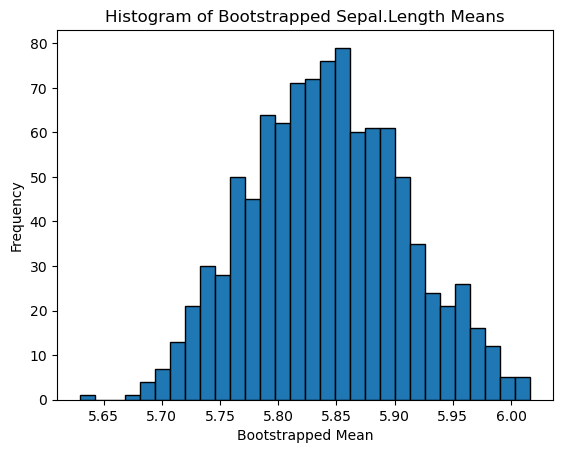

In [87]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
plt.hist(boot_se_samples, bins=30, edgecolor='k')

# Add a title
plt.title('Histogram of Bootstrapped Sepal.Length Means')

# Add a label to the x-axis
plt.xlabel('Bootstrapped Mean')

# Add a label to the y-axis
plt.ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

Original Mean: 5.8433
Bootstrapped Mean: 5.8423
Difference: 0.0010
The bootstrapped mean is very close to the original mean. This means that the bootstrap process is reliable in estimating the central tendency of Sepal.Length. This minimal difference suggests that the mean Sepal.Length is stable across different samples.
Bootstrapped Standard Deviation: 0.0665
This value indicates the variability of the Sepal.Length means across the bootstrapped samples. The relatively low standard deviation suggests that the Sepal.Length data is fairly consistent and not subject to large fluctuations.
Bootstrapped Range: 0.3873
The range of the bootstrapped samples provides an estimate of the spread of the Sepal.Length values. This range suggests that while there is some variability in Sepal.Length, it's not extremely wide.
95% Confidence Interval: [5.7186,5.9747]
The confidence interval for the mean Sepal.Length indicates that we are 95% confident that the true mean lies within this range. This range is relatively tight, which further supports the consistency and reliability of the Sepal.Length measurements.

In [95]:
# Write your answer here

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
